# Decomposition of Time Series

Classical decomposition of time series involves consideration of additive or multiplicative combination of:

- base level
- trend
- seasonality
- residual (error)

Use `statsmodels.tsa.seasonal.seasonal_decompose`to implement this.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set()
plt.style.use("seaborn-whitegrid")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/a10.csv", parse_dates=["date"], index_col="date")
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


## Initial visualization

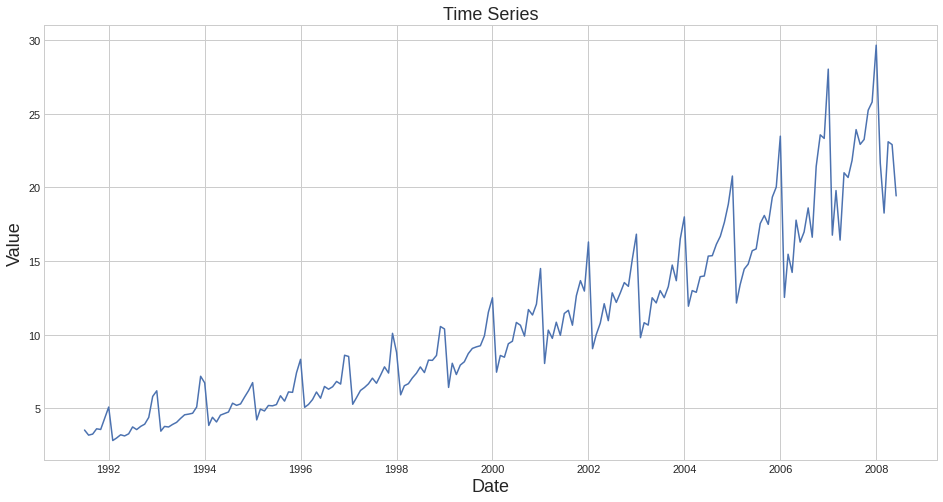

In [3]:
plt.figure(figsize=(16,8))
plt.plot(df.index, df.loc[:, "value"])
plt.title("Time Series", fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Value", fontsize=18)
plt.show()

## Decomposition

- `extrapolate_trend="freq"` handles any missing values in the trend and residuals at the start of the series.
- In this example, the residuals of the additive time series has some type of pattern left over. However, the multiplicative time series does not, which is better, and so it is the preferred choice for this example series.
- The numerical output of the components (trend, seasonal, and residual) are stored in the `multi_decomp` and `addi_decomp` outputs themselves.


In [4]:
# multiplicative decomposition
multi_decomp = seasonal_decompose(df.loc[:, "value"], model="multiplicative", extrapolate_trend="freq")

In [5]:
# additive decomposition
addi_decomp = seasonal_decompose(df.loc[:, "value"], model="additive", extrapolate_trend="freq")

In [6]:
# plot
def plot_decomposition(decomposition, axes, title=""):
  axes[0].set_title(title)
  decomposition.observed.plot(ax=axes[0], legend=False)
  axes[0].set_ylabel('Observed')
  decomposition.trend.plot(ax=axes[1], legend=False)
  axes[1].set_ylabel('Trend')
  decomposition.seasonal.plot(ax=axes[2], legend=False)
  axes[2].set_ylabel('Seasonal')
  decomposition.resid.plot(ax=axes[3], legend=False)
  axes[3].set_ylabel('Residual')

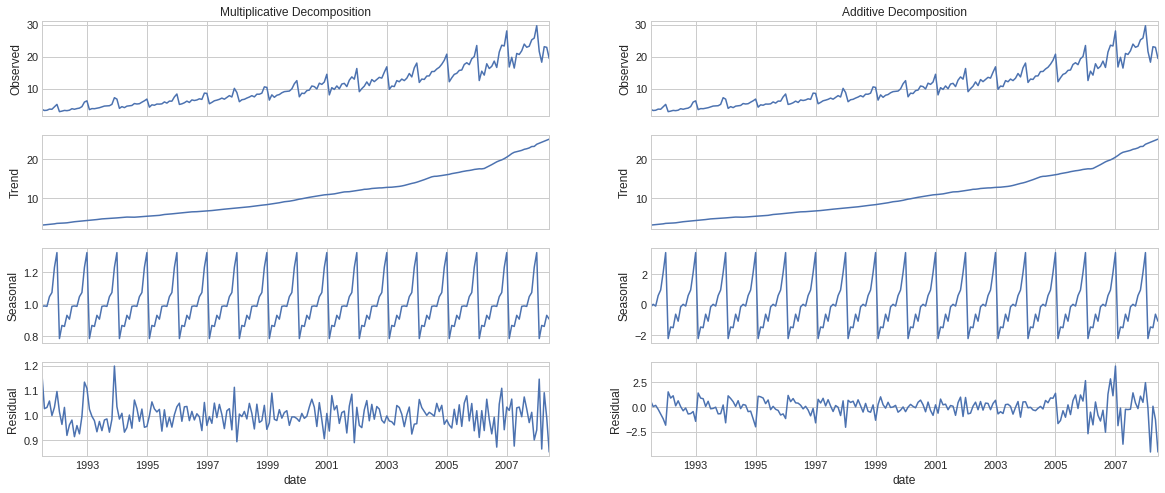

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=2, sharex=True, figsize=(20,8))

plot_decomposition(multi_decomp, axes[:,0], "Multiplicative Decomposition")
plot_decomposition(addi_decomp, axes[:,1], "Additive Decomposition")

plt.show()

In [8]:
# Extract the multiplicative components
# Actual values = trend * seasonal * residual
df_reconstructed = pd.concat([multi_decomp.seasonal, multi_decomp.trend, multi_decomp.resid, multi_decomp.observed], axis=1)
df_reconstructed.columns = ["Seasonal", "Trend", "Residual", "Actual Value"]
df_reconstructed

,Seasonal,Trend,Residual,Actual Value
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869
...,...,...,...,...
2008-02-01,0.785976,24.037399,1.146165,21.654285
2008-03-01,0.868249,24.298458,0.865756,18.264945
2008-04-01,0.861883,24.559516,1.091662,23.107677


The product of `Seasonal`, `Trend`, and `Residual` should exactly equal the `Actual Value`.